# Indian Election Analysis

India's lower house of Parliament,the Lok Sabha, has 543 seats in total.Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers.

There are more than 700 million voters with more than 800,000 polling stations.

The Lok Sabha election is a very complex affair as it involves a lot of factors. It is this very fact that makes it a perfect topic to analyze.

Currently there are two major parties in India, Bhartiya Janta Party(BJP) and Indian National Congress(INC).

As India is country of diversities, and each region is very different from every other region, there are a lot of regional or state parties having major influences. These parties can either support any of the alliance to make a government or can stay independent.

There are two major alliances, the NDA led by BJP and the UPA led by INC.

## About the data set

### There are two datasets:

#### 1. 2009 Candidate dataset:

The candidate dataset has 15 features namely  'ST_CODE', 'State_name', 'Month', 'Year', 'PC_Number', 'PC_name', 'PC_Type', 'Candidate_Name', 'Candidate_Sex', 'Candidate_Category', 'Candidate_Age', 'Party_Abbreviation', 'Total_Votes_Polled', 'Position','Alliance'.

#### 2. 2009 Electors dataset

The elector dataset consist of 8 features namely 'STATE CODE', 'STATE', 'PC NO', 'PARLIAMENTARY CONSTITUENCY','Total voters', 'Total_Electors', 'TOT_CONTESTANT', 'POLL PERCENTAGE'.

In [ ]:
img_black=np.zeros([100,100,3],dtype)

## Loading necessary Libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

electors_2009 = pd.read_csv("C:/Users/mrityunjay1.pandey/GreyAtom/Day6/LS2009Electors.csv")
candidate_2009 = pd.read_csv("C:/Users/mrityunjay1.pandey/GreyAtom/Day6/candidate09.csv")


## Task 1 : Plot a bar chart to compare the number of male and female candidates in the election

In [ ]:
temp=candidate_2009.Candidate_Sex.value_counts().to_dict()
plt.bar(*zip(*temp.items()))

## Task 2 : Plot a histogram of the age of all the candidates as well as of the winner amongst them. Compare them and note an observation

In [ ]:
plt.figure()
fig,ax=plt.subplot(nrows=1,ncols=2,tight_layout=True)
ax[0].plt.hist(candidate_2009[candidate_2009["Position"]==1].Candidate_Age)
plt.show()

## Task 3 : Plot a bar graph to get the vote shares of different parties

In [ ]:
#Sorting the pivot to get list of values
ts=candidate_2009.pivot_table(index='Party_Abbreviation',aggfunc='sum').Total_Votes_Polled.sort_values(ascending=False)

In [ ]:
ts

In [ ]:
import random
r = lambda: random.randint(0,255)

plt.bar(ts[:10].index,ts[:10].values,color=('#%02X%02X%02X' % (r(),r(),r())))

print(('#%02X%02X%02X' % (r(),r(),r())))

## Task 4 : Plot a barplot to compare the mean poll percentage of all the states

In [ ]:
plt.figure(figsize=(20,15))
temp=electors_2009.pivot_table(index='STATE')['POLL PERCENTAGE'].sort_values(ascending=True).to_dict()
plt.barh(*zip(*temp.items()))
plt.show()

## Task 5 : Plot a bar plot to compare the seats won by different parties in Uttar Pradesh

In [ ]:
#Function defination for changing color according to the number of bars for plotting.
def color_change(val):
    col_list=[]
    import random
    r = lambda: random.randint(0,255)
    for i in range(0,len(val)):
        col_list.append('#%02X%02X%02X' % (r(),r(),r()))
    return col_list

In [ ]:
#candidate_2009[candidate_2009['Position']==1].groupby(by='PC_name').count()
temp=candidate_2009[candidate_2009['State_name']=='Uttar Pradesh'] [candidate_2009['Position']==1]
val=temp.pivot_table(index="Party_Abbreviation",aggfunc='count').PC_Number.sort_values(ascending=False)
plt.bar(val.index,val.values,color=color_change(val))
plt.title("Seats won in U.P by Parties")
plt.xlabel("Party Abberevation")
plt.ylabel("Total Seats Won")

## Task 6 : Plot a stacked bar chart to compare the number of seats won by different `Alliances` in Gujarat,Madhya Pradesh and Maharashtra. 

In [181]:
temp6=candidate_2009[candidate_2009['State_name'].isin(['Gujarat', 'Madhya Pradesh', 'Maharashtra'])][candidate_2009['Position']==1]

In [127]:
val6=temp6.pivot_table(index="State_name",columns="Party_Abbreviation",aggfunc='count').Alliance

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

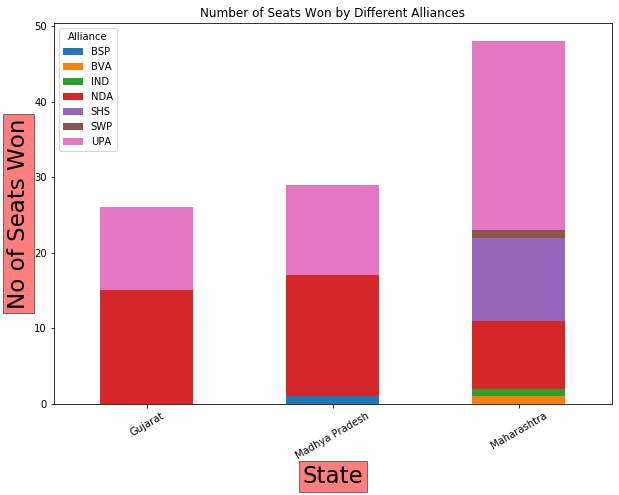

In [198]:
#With group By State and plotting Alliance as stacekd
temp6.groupby('State_name').Alliance.value_counts().unstack(level=1).plot.bar(stacked=True,figsize=(10,7))
plt.title("Number of Seats Won by Different Alliances")
plt.xlabel("State",fontsize=23,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel("No of Seats Won",fontsize=23,bbox=dict(facecolor='red', alpha=0.5))
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

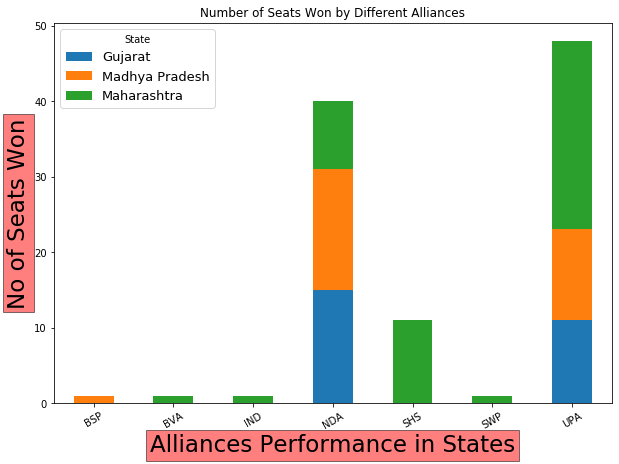

In [195]:
#With group By Alliance and plotting State as stacekd
temp6.groupby('Alliance').State_name.value_counts().unstack(level=1).plot.bar(stacked=True,figsize=(10,7))
plt.title("Number of Seats Won by Different Alliances")
plt.xlabel("Alliances Performance in States",fontsize=23,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel("No of Seats Won",fontsize=23,bbox=dict(facecolor='red', alpha=0.5))
plt.legend(title="State",fontsize=13)
plt.xticks(rotation=30)

## Task 7 : Plot a grouped bar chart to compare the number of winner candidates on the basis of their caste in the states of Andhra Pradesh, Kerala, Tamil Nadu and Karnataka

In [199]:
candidate_2009.head(1)

,ST_CODE,State_name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_Votes_Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP


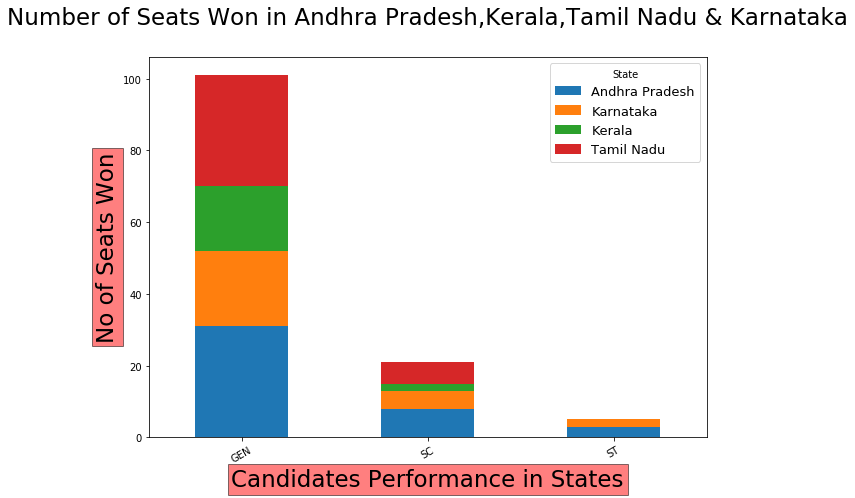

In [290]:
temp7=candidate_2009[candidate_2009['State_name'].isin(['Andhra Pradesh','Kerala','Tamil Nadu','Karnataka'])][candidate_2009['Position']==1]
#Uncomment below line if you want to visualize performance in each state based on candidates category.
#temp7.groupby('State_name').Candidate_Category.value_counts().unstack(level=1).plot.bar(stacked=True,figsize=(10,7))
#Uncomment below line if you want to visualize performance of candidate based on category.
temp7.groupby('Candidate_Category').State_name.value_counts().unstack(level=1).plot.bar(stacked=True,figsize=(10,7))
plt.title("Number of Seats Won in Andhra Pradesh,Kerala,Tamil Nadu & Karnataka\n",fontsize=23)
plt.xlabel("Candidates Performance in States",fontsize=23,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel("No of Seats Won",fontsize=23,bbox=dict(facecolor='red', alpha=0.5))
plt.legend(title="State",fontsize=13)
plt.xticks(rotation=30)
plt.show()

## Task 8 : Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000

Text(0.5, 1.0, 'Parliamentary constituency with total voters less than 100000')

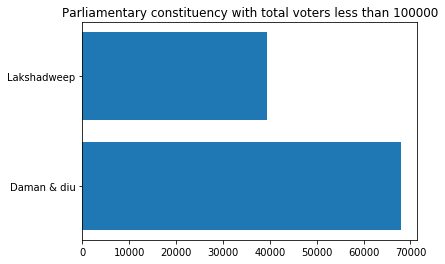

In [282]:
temp8=electors_2009[electors_2009['Total voters']<100000]
plt.barh(temp8["PARLIAMENTARY CONSTITUENCY"],temp8['Total voters'])
plt.title("Parliamentary constituency with total voters less than 100000")


In [280]:
temp8

,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
533,U04,Daman & Diu,1,Daman & diu,68025,95382,7,71.32
541,U06,Lakshadweep,1,Lakshadweep,39498,45983,4,85.90


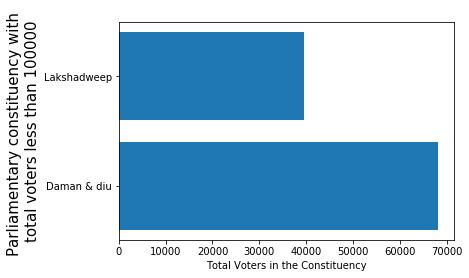

In [289]:
temp9=electors_2009[electors_2009['Total voters']<100000][['Total voters','PARLIAMENTARY CONSTITUENCY']]
plt.barh(temp9['PARLIAMENTARY CONSTITUENCY'],temp9['Total voters'])
plt.xlabel("Total Voters in the Constituency")
plt.ylabel("Parliamentary constituency with \ntotal voters less than 100000",fontsize=15)
plt.show()

In [254]:
candidate_2009.head(3)

,ST_CODE,State_name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_Votes_Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP


## Task 9: Plot a pie chart with the top 10 parties with majority seats in the elections

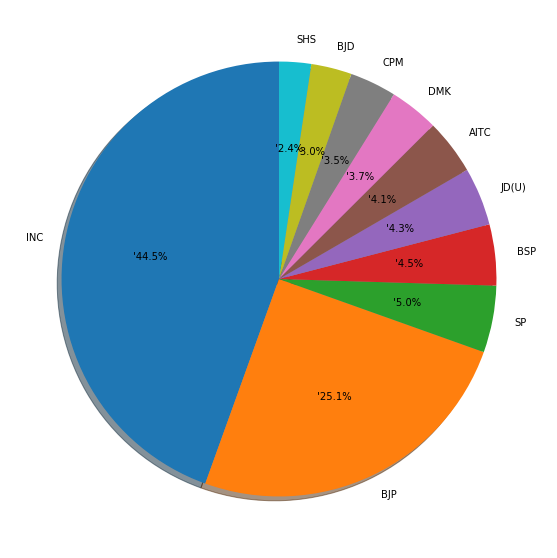

In [326]:
top_10=candidate_2009[candidate_2009['Position']==1].groupby(by='Party_Abbreviation').Position.count().sort_values(ascending=False)[:10]
#per_top_10=(top_10/top_10.sum())*100
plt.figure(figsize=(10,10))
plt.pie(top_10.values,labels=top_10.index, autopct="'%1.1f%%",shadow=True, startangle=90)
plt.show()

In [317]:
final = winner.Party_Abbreviation.value_counts()[:6].to_dict()

## Task 10 : Plot a pie diagram for top 9 states with most number of seats

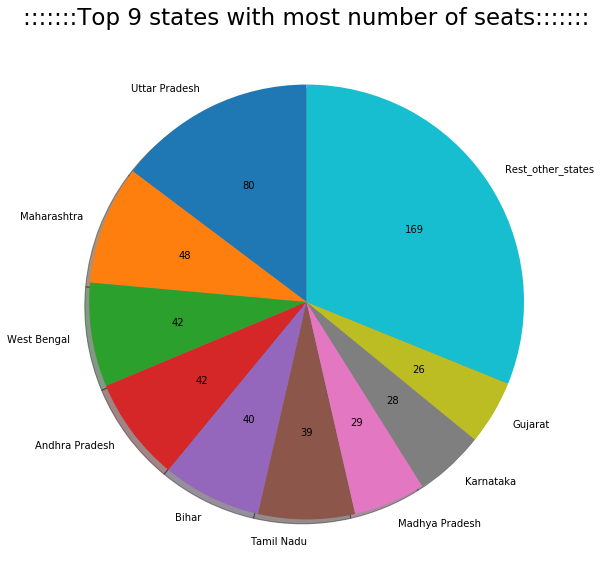

In [9]:
import seaborn as sns
#candidate_2009['State_name'].PC_name.value_counts()
top9_states=electors_2009.STATE.value_counts()[:9]
total_seats=electors_2009.STATE.value_counts().sum()
seats_other_states=total_seats-top9_states.sum()
top9_states['Rest_other_states']=seats_other_states
plt.figure(figsize=(10,10))
p, tx, autotexts=plt.pie(top9_states.values,labels=top9_states.index, autopct='',shadow=True, startangle=90)
plt.title(":::::::Top 9 states with most number of seats:::::::",fontsize=23)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(top9_states[i]))
plt.show()

In [333]:
total_seats-top9_states.sum()

169

Uttar Pradesh                80
Maharashtra                  48
Andhra Pradesh               42
West Bengal                  42
Bihar                        40
Tamil Nadu                   39
Madhya Pradesh               29
Karnataka                    28
Gujarat                      26
Rajasthan                    25
Orissa                       21
Kerala                       20
Assam                        14
Jharkhand                    14
Punjab                       13
Chattisgarh                  11
Haryana                      10
NCT OF Delhi                  7
Jammu & Kashmir               6
Uttarakhand                   5
Himachal Pradesh              4
Meghalaya                     2
Goa                           2
Arunachal Pradesh             2
Manipur                       2
Tripura                       2
Mizoram                       1
Sikkim                        1
Dadra & Nagar Haveli          1
Chandigarh                    1
Daman & Diu                   1
Andaman 